# Summarize the different split approaches for all datasets

- [x] Read in all datasets
- [x] Bring into one table
- [x] Format the output

In [1]:
# imports
import pandas as pd
import helpers_summarize

## What is the average rank of the approach with **time-sorted** users with its std?

In [2]:
# load data
df = helpers_summarize.load_approach_tables(path='../../results/tables/approaches/sorted_users/single_dataset')


# summarize and print
results = helpers_summarize.prepare_results(df)
results.transpose().to_csv('../../results/tables/approaches/sorted_users/approaches_ranking.csv')
results.transpose()

,time_cut,bl_user_based_last,bl_user_based_all,user_cut,average_user,user_wise,bl_assessment_based_last,bl_assessment_based_all
average_rank,2.43,3.00,3.17,3.43,3.57,4.67,6.83,7.67
average_rank_std,1.62,1.67,2.32,1.62,0.79,1.97,0.75,0.52


### Results with model trained on whole train set
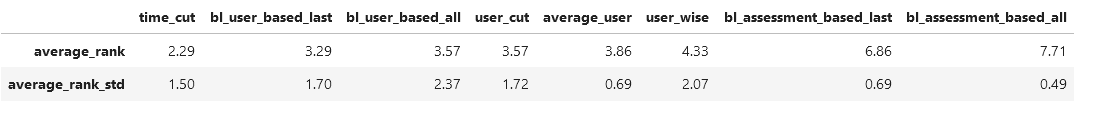

### Results with best model from train set (~80 % of the train data)
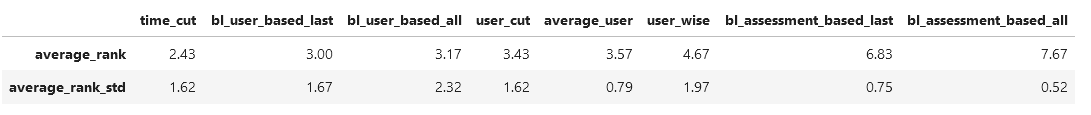

**No real difference. Std sometimes larger, sometimes smaller**

In [3]:
df.columns

Index(['cc_f1', 'cc_std', 'cc_val-mean', 'ch_stress_f1', 'ch_stress_std',
       'ch_stress_val-mean', 'rki_children_f1', 'rki_children_std',
       'rki_children_val-mean', 'rki_heart_f1', 'rki_heart_std',
       'rki_heart_val-mean', 'rki_parent_f1', 'rki_parent_std',
       'rki_parent_val-mean', 'tyt_f1', 'tyt_std', 'tyt_val-mean', 'uniti_f1',
       'uniti_std', 'uniti_val-mean'],
      dtype='object')

In [4]:
# load columns mapping
dic = helpers_summarize.load_col_paper_mapping()
for old, new in dic.items():
    df.columns = df.columns.str.replace(old, new)
df.to_csv('../../results/tables/approaches/sorted_users/raw_results.csv', index='approaches')
df.dropna()

,cc_f1,cc_std,cc_val-mean,chs_f1,chs_std,chs_val-mean,chy_f1,chy_std,chy_val-mean,chp_f1,...,chp_val-mean,cha_f1,cha_std,cha_val-mean,tyt_f1,tyt_std,tyt_val-mean,uniti_f1,uniti_std,uniti_val-mean
user_cut,0.672771,0.01423,0.768045,0.508361,0.049499,0.547319,0.976338,0.018043,0.988474,0.419858,...,0.477861,0.630852,0.037487,0.657959,0.557294,0.022502,0.548773,0.518429,0.025093,0.558128
time_cut,0.675378,0.00538,0.775699,0.499513,0.012902,0.574657,0.996467,0.007066,0.988884,0.470091,...,0.532493,0.642343,0.012311,0.698672,0.564345,0.002476,0.587046,0.537538,0.003627,0.583047
average_user,0.639853,0.04694,0.724983,0.543429,0.035865,0.511922,0.948814,0.014593,0.982759,0.473765,...,0.436979,0.641994,0.037857,0.667257,0.423029,0.037779,0.459734,0.469511,0.016191,0.559204


### Results with model trained on whole train set
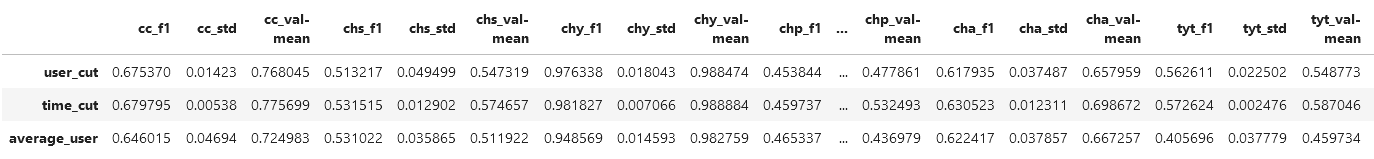

### Results with best model from train set (trained on ~80 % of the data)
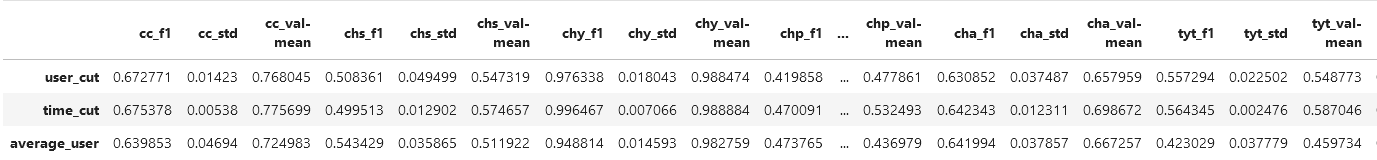